In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [285]:
#Converting the dataset into a pandas dataframe.
df = pd.read_csv('/Users/sanidhya/Downloads/wdbc.dataset', header=None)

In [286]:
#Mapping the values B/M to 0/1 in the diagnosis column.
df[1] = df[1].map({'B': 0, 'M': 1})

#Dropping the columns ID and Diagnosis to obtain the dataset.
X = df.drop([0,1],1)
X = preprocessing.scale(X)

#Obtaining Y which will be the diagnosis column.
Y = df[1]

#Splitting the data into Training, testing and validation data in 8:1:1 ratio.
X_Training, X_Testing, Y_Training, Y_Testing = train_test_split(X, Y, test_size=0.2, random_state=10)
X_Testing, X_Validation, Y_Testing, Y_Validation = train_test_split(X_Testing,Y_Testing, test_size=0.5, random_state=10)

#Reshaping the data to make it suitable for mathematical calculations.
X_Training, Y_Training = X_Training.T, Y_Training.values.reshape(1, Y_Training.shape[0])
X_Testing, Y_Testing = X_Testing.T, Y_Testing.values.reshape(1, Y_Testing.shape[0])
X_Validation, Y_Validation = X_Validation.T, Y_Validation.values.reshape(1, Y_Validation.shape[0])

In [287]:
#Defining the sigmoid function which is used to map any real value into another value between 0 and 1. 
#It is used to map predictions to probabilities.
def sigmoid(s):
    sig = 1 / (1 + np.exp(-s))
    return sig

In [288]:
#Definition for the preddiction function
def prediction(w, b, X_Data):

    m = X_Data.shape[1]
    Y_Prediction = np.zeros((1,m))
    S = sigmoid(np.dot(w.T, X_Data) + b)
    for i in range(S.shape[1]):
        Y_Prediction[0, i] = 1 if S[0, i] > 0.5 else 0

    return Y_Prediction

In [289]:
#Definition to plot cost function
def plot_costfunction(cost):
    plt.plot(cost,label="loss")
    plt.xlabel('Epochs',fontweight="bold",fontsize = 10)
    plt.ylabel('Loss',fontweight="bold",fontsize = 10)
    plt.title("Cost Function",fontweight="bold",fontsize = 15)
    plt.legend()
    plt.show()

In [290]:
#Definition to plot training accuracy
def plot_accuracy(accuracy):
    plt.plot(accuracy,label="accuracy")
    plt.xlabel('Epochs',fontweight="bold",fontsize = 10)
    plt.ylabel('Training Accuracy',fontweight="bold",fontsize = 10)
    plt.title("Accuracy Function",fontweight="bold",fontsize = 15)
    plt.legend()
    plt.show()

In [291]:
#Function to calculate the confusion matrix
def confusionmatrix(y_true, y_pred):
    cmatrix = confusion_matrix(y_true, y_pred)
    TP = cmatrix[0,0] # True Positive
    FN = cmatrix[0,1] # False Negative
    FP = cmatrix[1,0] # False Positive
    TN = cmatrix[1,1] # True Negative   
    return TP,TN,FP,FN

In [292]:
#Give some values for no of epochs and the learning rate
epochs = 1000
learningrate = 0.005

X = X_Training
Y = Y_Training
losstrack = []
accuracytrack = []
m = X.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01
b = 0

for epoch in range(epochs):
    z = np.dot(w.T, X) + b
    p = sigmoid(z)
    
    #Using the cross-entropy cost function
    
    cost = -np.sum(np.multiply(np.log(p) , Y) + np.multiply((1 - Y), np.log(1 - p)))/m
    
    losstrack.append(np.squeeze(cost))

    dz = p-Y
    dw = (1 / m) * np.dot(X, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learningrate * dw
    b = b - learningrate * db
    
    if epoch % 50 == 0 :
        print('Cost is '+str(cost))

    
    Y_prediction_train = prediction(w, b, X_Training)

    #Calculating the confusion matrix using the training data
    TP,TN,FP,FN = confusionmatrix(Y_Training.T, Y_prediction_train.T)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    accuracytrack.append(np.squeeze(accuracy))


#Calculating accuracy, precision and recall using the testing data
Y_prediction_test = prediction(w, b, X_Testing)
TP,TN,FP,FN = confusionmatrix(Y_Testing.T, Y_prediction_test.T)

accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)

print ('Accuracy: {}'.format(accuracy))
print ('Precision: {}'.format(precision))
print ('Recall: {}'.format(recall))
print('Training accuracy: {}%'.format(100 - np.mean(np.abs(Y_prediction_train - Y_Training)) * 100))
print('Testing accuracy: {}%'.format(100 - np.mean(np.abs(Y_prediction_test - Y_Testing)) * 100))

Cost is 0.6952487268908816
Cost is 0.4264074750252153
Cost is 0.33265119544179317
Cost is 0.2835725019244123
Cost is 0.25263079091120716
Cost is 0.23096801070501197
Cost is 0.21475254460864554
Cost is 0.20204143124307133
Cost is 0.19173663577250183
Cost is 0.18316669376987563
Cost is 0.17589559865591592
Cost is 0.16962655904452417
Cost is 0.16414971665766404
Cost is 0.1593119673479036
Cost is 0.15499865155302434
Cost is 0.15112197424690466
Cost is 0.1476134181748294
Cost is 0.14441862053349663
Cost is 0.14149382109848546
Cost is 0.13880334247278692
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Training accuracy: 96.7032967032967%
Testing accuracy: 100.0%


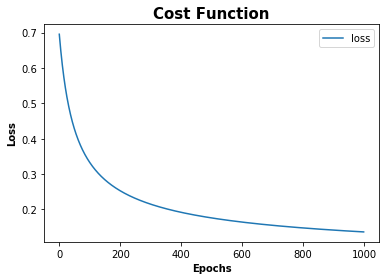

In [293]:
#Plotting the cost function
plot_costfunction(losstrack)

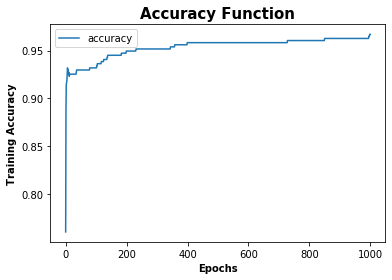

In [294]:
#Plotting the training accuracy
plot_accuracy(accuracytrack)